In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df=pd.read_csv('..\data\gdp_percapita.csv')

How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.shape

(7662, 4)

In [4]:
gdp_df.head()

Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN

In [5]:
type(gdp_df)

pandas.core.frame.DataFrame

In [6]:
type('Country or Area')

str

In [7]:
type('Year')

str

In [8]:
type('Value')

str

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns = ['Country','Year', 'GDP_Per_Capita']
gdp_df.head()
gdp_df

Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]

How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 


In [10]:
country_count = gdp_df.Country.value_counts().to_frame().reset_index()
country_count


index  Country
0    Least developed countries: UN classification       33
1                      Middle East & North Africa       33
2         Middle East & North Africa (IDA & IBRD)       33
3                                   Middle income       33
4                                        Mongolia       33
..                                            ...      ...
237                                        Kosovo       15
238                     Sint Maarten (Dutch part)       14
239                      Turks and Caicos Islands       12
240                                       Somalia       10
241                                      Djibouti       10

[242 rows x 2 columns]

In [11]:
country_count.columns =['country','count']
country_count

country  count
0    Least developed countries: UN classification     33
1                      Middle East & North Africa     33
2         Middle East & North Africa (IDA & IBRD)     33
3                                   Middle income     33
4                                        Mongolia     33
..                                            ...    ...
237                                        Kosovo     15
238                     Sint Maarten (Dutch part)     14
239                      Turks and Caicos Islands     12
240                                       Somalia     10
241                                      Djibouti     10

[242 rows x 2 columns]

In [12]:
gdp_df.Year.nunique()

33

In [26]:
my_list =[ 33]
country_count_all_data = country_count.loc[country_count["count"].isin(my_list)]
country_count

country  count
0    Least developed countries: UN classification     33
1                      Middle East & North Africa     33
2         Middle East & North Africa (IDA & IBRD)     33
3                                   Middle income     33
4                                        Mongolia     33
..                                            ...    ...
237                                        Kosovo     15
238                     Sint Maarten (Dutch part)     14
239                      Turks and Caicos Islands     12
240                                       Somalia     10
241                                      Djibouti     10

[242 rows x 2 columns]

In [27]:
year_counts = gdp_df.Year.value_counts().to_frame().reset_index()
year_counts


index  Year
0    2013   242
1    2016   242
2    2014   242
3    2015   242
4    2020   242
5    2017   242
6    2018   242
7    2019   242
8    2021   241
9    2012   240
10   2011   240
11   2010   239
12   2009   239
13   2008   238
14   2007   237
15   2006   237
16   2004   236
17   2005   236
18   2003   235
19   2002   235
20   2001   234
21   2000   233
22   2022   232
23   1999   227
24   1998   226
25   1997   226
26   1996   223
27   1995   223
28   1994   213
29   1993   211
30   1992   210
31   1991   208
32   1990   207

<AxesSubplot:xlabel='year', ylabel='count'>

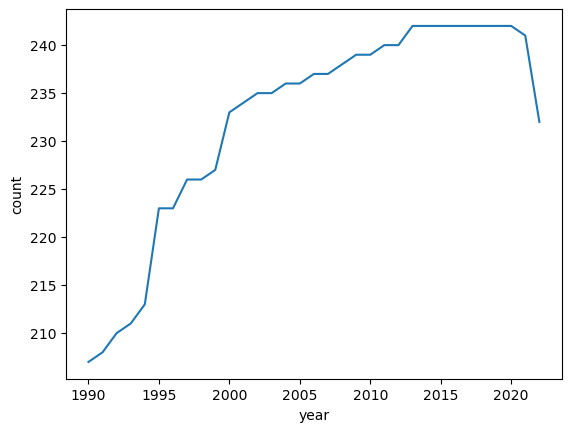

In [30]:
sns.lineplot(data = year_counts, x = 'year',y = 'count')


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

(array([836., 659., 679., 702., 707., 951., 719., 726., 726., 957.]),
 array([1990. , 1993.2, 1996.4, 1999.6, 2002.8, 2006. , 2009.2, 2012.4,
        2015.6, 2018.8, 2022. ]),
 <BarContainer object of 10 artists>)

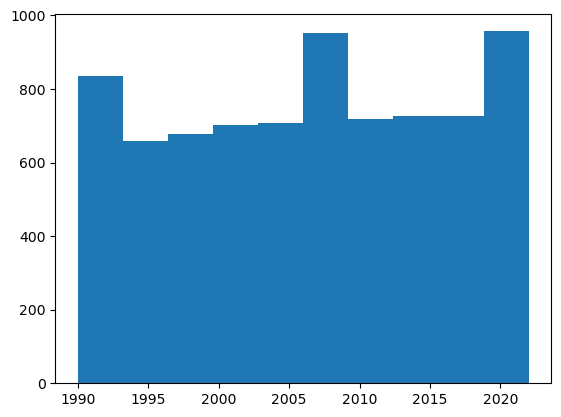

In [37]:
plt.hist(gdp_df['Year'])

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

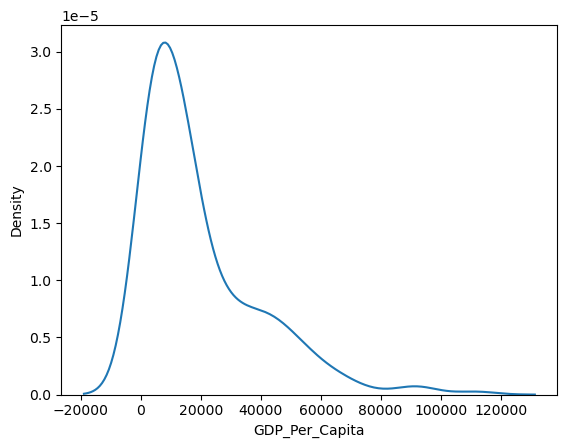

In [66]:
sns.kdeplot(data = year_2020, x ='GDP_Per_Capita')

<AxesSubplot:xlabel='GDP_Per_Capita'>

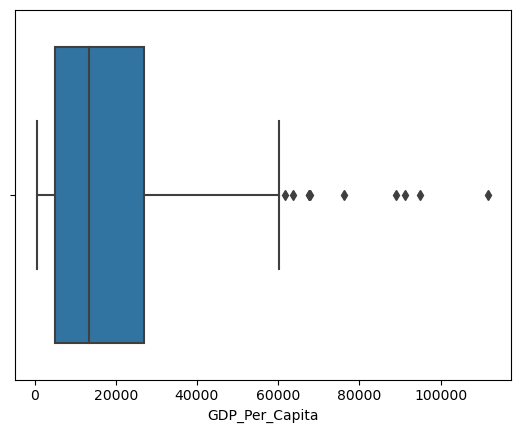

In [68]:
sns.boxplot(data = year_2020, x="GDP_Per_Capita")

9.)What was the median GDP per capita value in 2020?

In [51]:
year_2020 = gdp_df.loc[gdp_df['Year']==2020]
year_2020

Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]

In [52]:
year_2020.GDP_Per_Capita.median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

11. Which country was the first to have a GDP per capita greater than $100,000?

In [69]:
gdp = gdp_df.GDP_Per_Capita > 100000
gdp

0       False
1       False
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661    False
Name: GDP_Per_Capita, Length: 7662, dtype: bool

In [ ]:
type(gdp)

In [72]:
gdp1 = gdp_df.loc[gdp]['Year'].min()
gdp1

1990

In [74]:
gdp_df.loc[gdp_df.Year == 1990][gdp_df.GDP_Per_Capita>100000]

C:\Users\eykin\AppData\Local\Temp\ipykernel_32500\2375269515.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp_df.loc[gdp_df.Year == 1990][gdp_df.GDP_Per_Capita>100000]


Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [75]:
richest_2020 = year_2020.nlargest(1,'GDP_Per_Capita')
richest_2020

Country  Year  GDP_Per_Capita
4148  Luxembourg  2020   111751.314751

In [77]:
year_2020.sort_values('GDP_Per_Capita', ascending = False)

Country  Year  GDP_Per_Capita
4148                Luxembourg  2020   111751.314751
6108                 Singapore  2020    94910.101431
3279                   Ireland  2020    91356.855054
5746                     Qatar  2020    89019.069857
681                    Bermuda  2020    76117.804744
...                        ...   ...             ...
5074                     Niger  2020     1214.546556
6273                   Somalia  2020     1127.418534
1630           Dem. Rep. Congo  2020     1044.071214
1217  Central African Republic  2020      847.765012
973                    Burundi  2020      711.355263

[242 rows x 3 columns]

In [78]:
richest_history = gdp_df[gdp_df.Country == 'Luxembourg'].sort_values('Year').reset_index(drop=True)
richest_history

Country  Year  GDP_Per_Capita
0   Luxembourg  1990    70860.819124
1   Luxembourg  1991    75961.668717
2   Luxembourg  1992    76323.304753
3   Luxembourg  1993    78468.921760
4   Luxembourg  1994    80365.224508
5   Luxembourg  1995    80379.127629
6   Luxembourg  1996    80401.032017
7   Luxembourg  1997    83702.813530
8   Luxembourg  1998    88185.800110
9   Luxembourg  1999    94115.384035
10  Luxembourg  2000    99301.526999
11  Luxembourg  2001   101143.147977
12  Luxembourg  2002   103317.331098
13  Luxembourg  2003   104743.000088
14  Luxembourg  2004   107634.837198
15  Luxembourg  2005   108632.360016
16  Luxembourg  2006   113346.035782
17  Luxembourg  2007   120647.822959
18  Luxembourg  2008   118154.667184
19  Luxembourg  2009   112230.081410
20  Luxembourg  2010   114343.988089
21  Luxembourg  2011   112998.390477
22  Luxembourg  2012   112137.135491
23  Luxembourg  2013   113050.663254
24  Luxembourg  2014   113313.578898
25  Luxembourg  2015   113182.728563
26  Luxembourg  2016   116283.699681
27  Luxembourg  2017   114985.842236
28  Luxembourg  2018   114164.468558
29  Luxembourg  2019   114542.496934
30  Luxembourg  2020   111751.314751
31  Luxembourg  2021   115683.493708
32  Luxembourg  2022   115541.774828

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

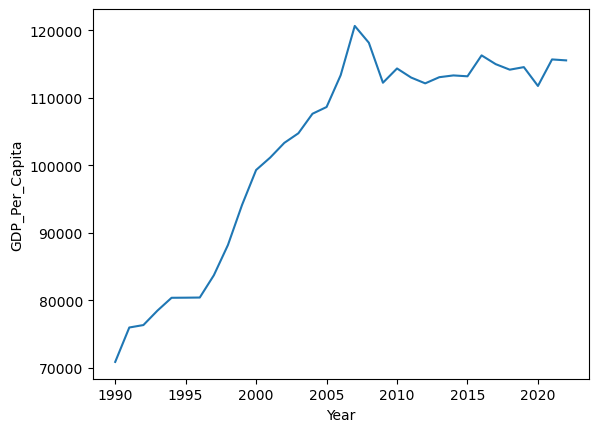

In [82]:
sns.lineplot(data=richest_history, x = 'Year', y ='GDP_Per_Capita')